In [14]:
import cv2
import numpy as np

def imshow(img):
  randomInt = str(np.random.randint(0,1000))
  cv2.imshow('image'+randomInt,img)
  cv2.waitKey(60000)
def imshowf(img):
  randomInt = str(np.random.randint(0, 1000))
  cv2.imshow('image'+randomInt, img)
  cv2.waitKey(60000)
  cv2.destroyAllWindows()


True

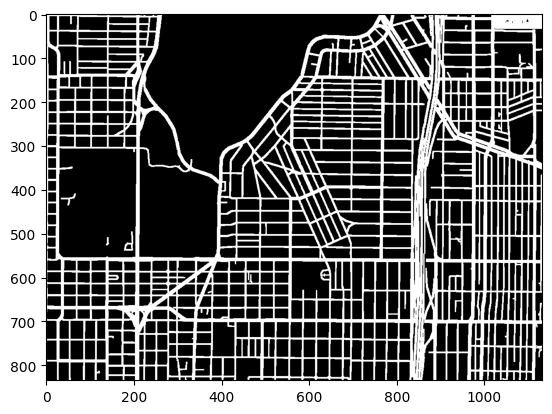

In [1]:
# Import the necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the Google Maps screenshot
image = cv2.imread("./road.png")

# detect highway roads of yellowish color and display them in white color
yellow = np.uint8([[[255,255,0 ]]])
hsv_yellow = cv2.cvtColor(yellow,cv2.COLOR_BGR2HSV)
lower_yellow = np.array([hsv_yellow[0][0][0]+55,100,100])
upper_yellow = np.array([hsv_yellow[0][0][0]+60,255,255])
mask = cv2.inRange(image, lower_yellow, upper_yellow)
res = cv2.bitwise_and(image,image, mask=mask)
res_gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)  # convert to binary image
# using the res_gray image, replace the yellowish color with white color
image[res_gray>0] = (255,255,255)

# Threshold the image to get the roads(ROI) apart from non-white areas (like water bodies and other non-road areas)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,250,255,cv2.THRESH_BINARY)

# display the image
plt.imshow(thresh, cmap='gray')

# remove not long enough lines (dots of small area)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    if cv2.contourArea(cnt) < 5:
        cv2.drawContours(thresh, [cnt], 0, (0,0,0), -1)

# save the grey image
cv2.imwrite('road_grey.png', thresh)

# make the lines thicker
kernel = np.ones((3,3),np.uint8)
dilation = cv2.dilate(thresh,kernel,iterations = 1)

# display the image
plt.imshow(dilation, cmap='gray')

# save the grey dilated image
cv2.imwrite('road_dil_grey.png', dilation)